In [125]:
import pandas as pd
import numpy as np


In [126]:
data = pd.read_csv("shuffled_data.csv")
data.shape

(1100, 21)

In [127]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [128]:
data.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [130]:
X = data.drop('stress_level', axis=1)
y = data['stress_level']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [132]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [133]:
# Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)

# SVM hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01, 0.001]
}

grid_svm = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_svm.best_params_)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [134]:
rf = RandomForestClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [135]:
svm = SVC(C=10,gamma=0.1,kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [136]:
cv_rf = cross_val_score(rf, X_train, y_train, cv=5)
cv_svm = cross_val_score(svm, X_train, y_train, cv=5)

print("Random Forest CV Scores:", cv_rf)
print("SVM CV Scores:", cv_svm)

Random Forest CV Scores: [0.90909091 0.85795455 0.89204545 0.85227273 0.85795455]
SVM CV Scores: [0.92613636 0.88068182 0.88068182 0.86931818 0.84659091]


In [137]:
y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

Random Forest Accuracy: 0.8772727272727273


array([[66,  4,  6],
       [ 6, 65,  2],
       [ 7,  2, 62]])

In [138]:
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred_svm)
cm

SVM Accuracy: 0.8772727272727273


array([[68,  4,  4],
       [ 9, 62,  2],
       [10,  2, 59]])

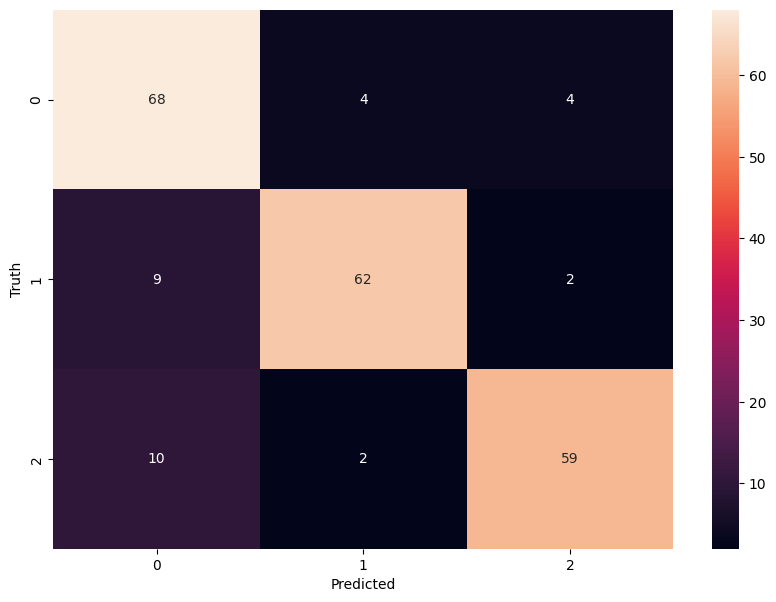

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [140]:
import joblib
joblib.dump(rf, 'stress_model.joblib')

['stress_model.joblib']